In [6]:
import sys
import os

# Add the parent directory of /notebooks to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [ ]:
# Import the components from your new package
from src.agent.dqn_agent import DQNAgent
from src.agent.double_dqn_agent import DoubleDQNAgent
from src.env.env import CustomBlackjackEnv
from src.utils.helpers import set_global_seeds

import matplotlib.pyplot as plt 
import logging # Import logging here too

# --- Configure logging at the very beginning of your main script ---
# This sets up a basic console handler for all loggers
# You can adjust the level here, e.g., logging.INFO or logging.DEBUG
logging.basicConfig(level=logging.INFO, format='%(message)s')

RANDOM_SEED = 18 # Or 18, or any other integer
set_global_seeds(RANDOM_SEED) # <--- Call this FIRST


In [8]:
# Initialize the custom Blackjack environment
env = CustomBlackjackEnv(render_mode=None, num_decks=1, blackjack_payout=1.5,
                         allow_doubling=False, allow_splitting=False, count_cards=False, seed=18)

# Observation and action space descriptions
print(f"Observation space: {env.observation_description}")
print(f"Action space: {env.action_description}")

# Dynamically derive state size and number of actions from env config
state_size = env.state_size
num_actions = env.num_actions
num_decks = env.num_decks
print(f"Derived state size: {state_size}, number of actions: {num_actions}")

# Create models directory if it doesn't exist
os.makedirs("models", exist_ok=True)

Observation space: (player_current_sum, dealer_card_showing, usable_ace)
Action space: 0: Stand, 1: Hit
Derived state size: 3, number of actions: 2


In [9]:
# Define parameters for the DQN Model
dqn_params = {
    "learning_rate": 1e-4,
    "gamma": 0.85,
    "epsilon_start": 1.0,
    "epsilon_end": 0.005,
    "epsilon_decay": 0.997,
    "replay_buffer_capacity": 25000,
    "train_freq": 1,
    "target_update_freq": 500,
    "verbose": 1 # or 0 for silent
}

# Define training parameters for the .fit method
training_params = {
    "num_episodes": 10000,
    "batch_size": 64,
    "log_interval": 1000
}

In [10]:
print("--- Training DQN Agent ---")

# Initialize with default parameters from settings.py
dqn_agent = DQNAgent(env, **dqn_params)# Pass params using **kwargs

# Start training
dqn_rewards_history = dqn_agent.fit(env, **training_params) # Pass params using **kwargs

# Save the trained model weights
dqn_agent.save_weights('models/dqn_blackjack.weights.h5')

Starting DQN training for 10000 episodes...


--- Training DQN Agent ---


Batch 1/10: 100%|██████████| 1000/1000 [00:11<00:00, 61.17 episode/s, AvgR=0.65, Eps=0.050, Buf=2208, Steps/Int=2208]
Episode 1000/10000, Avg Reward (last 1000): 0.6520, Epsilon: 0.050, 
Replay Buffer Size: 2208, Total Steps in Interval: 2208
Batch 2/10: 100%|██████████| 1000/1000 [00:10<00:00, 153.26 episode/s, AvgR=0.98, Eps=0.005, Buf=4032, Steps/Int=1824]
Episode 2000/10000, Avg Reward (last 1000): 0.9800, Epsilon: 0.005, 
Replay Buffer Size: 4032, Total Steps in Interval: 1824
Batch 3/10: 100%|██████████| 1000/1000 [00:10<00:00, 151.02 episode/s, AvgR=1.00, Eps=0.005, Buf=5854, Steps/Int=1822]
Episode 3000/10000, Avg Reward (last 1000): 0.9980, Epsilon: 0.005, 
Replay Buffer Size: 5854, Total Steps in Interval: 1822
Batch 4/10: 100%|██████████| 1000/1000 [00:18<00:00, 149.62 episode/s, AvgR=0.99, Eps=0.005, Buf=9058, Steps/Int=3204]
Episode 4000/10000, Avg Reward (last 1000): 0.9880, Epsilon: 0.005, 
Replay Buffer Size: 9058, Total Steps in Interval: 3204
Batch 5/10: 100%|████████

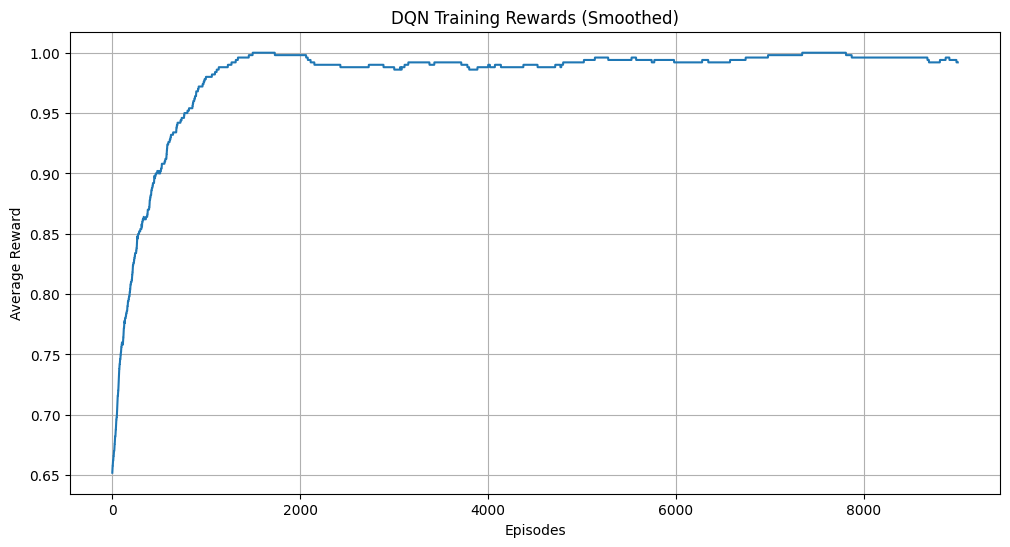

In [11]:
from src.utils.helpers import smooth

# Plotting the smoothed rewards
plt.figure(figsize=(12, 6))
plt.plot(smooth(dqn_rewards_history, w=1000)) # Use a smoothing window, e.g., 1000 episodes
plt.title("DQN Training Rewards (Smoothed)")
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.grid(True)
plt.show()

In [12]:
print("\n--- Evaluating DQN Agent ---")
eval_dqn_agent = DQNAgent(env, **dqn_params)
eval_dqn_agent.load_weights('models/dqn_blackjack.weights.h5')
dqn_win_rate, dqn_push_rate, dqn_loss_rate = eval_dqn_agent.evaluate(env, num_eval_episodes=10000)

DQN model weights loaded from models/dqn_blackjack.weights.h5
Starting evaluation for 10000 episodes...



--- Evaluating DQN Agent ---


DQN Evaluation: 100%|██████████| 10000/10000 [00:35<00:00, 285.67episode/s, Wins=10000, Pushes=0, Losses=0]

--- Evaluation Results ---
Total Episodes: 10000
Wins: 10000 (100.00%)
Pushes: 0 (0.00%)
Losses: 0 (0.00%)
--------------------------


In [13]:
print("\n--- Training Double DQN Agent ---")

double_dqn_agent = DoubleDQNAgent(env, **dqn_params)

# You can reuse training_params or define new ones
double_dqn_rewards_history = double_dqn_agent.fit(env, **training_params)

# Save the trained model weights
double_dqn_agent.save_weights('models/double_dqn_blackjack.weights.h5')

Double DQN initialized.
Starting Double DQN training for 10000 episodes...



--- Training Double DQN Agent ---


Batch 1/10: 100%|██████████| 1000/1000 [00:10<00:00, 73.95 episode/s, AvgR=0.69, Eps=0.050, Buf=2015, Steps/Int=2015]
Episode 1000/10000, Avg Reward (last 1000): 0.6860, Epsilon: 0.050, 
Replay Buffer Size: 2015, Total Steps in Interval: 2015
Batch 2/10: 100%|██████████| 1000/1000 [00:16<00:00, 158.17 episode/s, AvgR=0.97, Eps=0.005, Buf=4989, Steps/Int=2974]
Episode 2000/10000, Avg Reward (last 1000): 0.9740, Epsilon: 0.005, 
Replay Buffer Size: 4989, Total Steps in Interval: 2974
Batch 3/10: 100%|██████████| 1000/1000 [00:08<00:00, 156.78 episode/s, AvgR=0.99, Eps=0.005, Buf=6412, Steps/Int=1423]
Episode 3000/10000, Avg Reward (last 1000): 0.9940, Epsilon: 0.005, 
Replay Buffer Size: 6412, Total Steps in Interval: 1423
Batch 4/10: 100%|██████████| 1000/1000 [00:12<00:00, 134.78 episode/s, AvgR=0.99, Eps=0.005, Buf=8588, Steps/Int=2176]
Episode 4000/10000, Avg Reward (last 1000): 0.9940, Epsilon: 0.005, 
Replay Buffer Size: 8588, Total Steps in Interval: 2176
Batch 5/10: 100%|████████

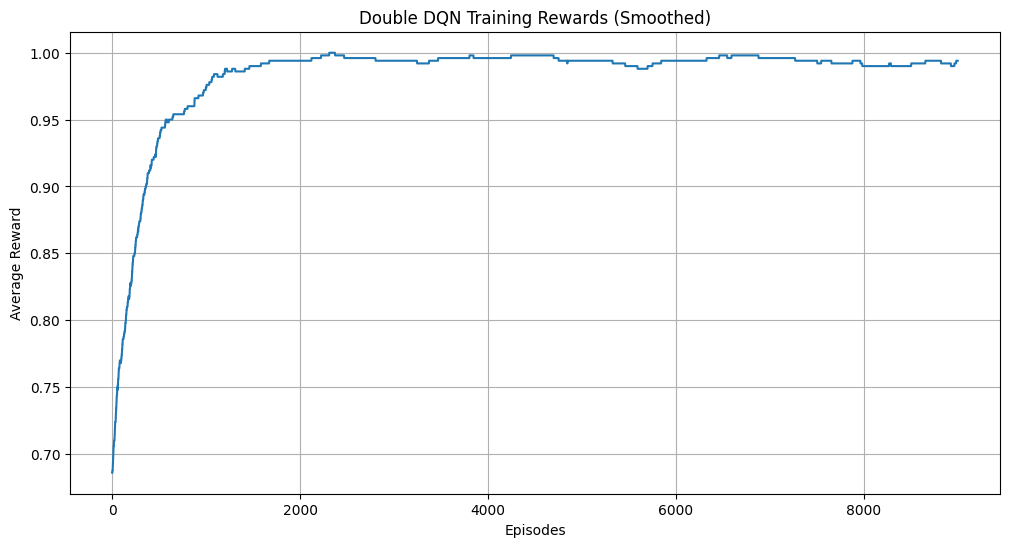

In [14]:
if 'double_dqn_rewards_history' in locals():
    plt.figure(figsize=(12, 6))
    plt.plot(smooth(double_dqn_rewards_history, w=1000))
    plt.title("Double DQN Training Rewards (Smoothed)")
    plt.xlabel("Episodes")
    plt.ylabel("Average Reward")
    plt.grid(True)
    plt.show()

In [15]:
if 'double_dqn_rewards_history' in locals():
    print("\n--- Evaluating Double DQN Agent ---")
    eval_double_dqn_agent = DoubleDQNAgent(env, **dqn_params)
    eval_double_dqn_agent.load_weights('models/double_dqn_blackjack.weights.h5')
    double_dqn_win_rate, double_dqn_push_rate, double_dqn_loss_rate = eval_double_dqn_agent.evaluate(env, num_eval_episodes=10000)

Double DQN initialized.
Double DQN model weights loaded from models/double_dqn_blackjack.weights.h5
Starting evaluation for 10000 episodes...



--- Evaluating Double DQN Agent ---


Double DQN Evaluation: 100%|██████████| 10000/10000 [00:35<00:00, 280.46episode/s, Wins=10000, Pushes=0, Losses=0]

--- Evaluation Results ---
Total Episodes: 10000
Wins: 10000 (100.00%)
Pushes: 0 (0.00%)
Losses: 0 (0.00%)
--------------------------


In [16]:
env.close()
print("Environment closed.")

Environment closed.
